In [1]:

import scipy.cluster .hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E28-3FB0

 Directory of C:\Users\HP\Desktop\Assignments\assignment no.7(clustering)

12/27/2022  04:36 PM    <DIR>          .
12/27/2022  04:36 PM    <DIR>          ..
12/27/2022  04:36 PM    <DIR>          .ipynb_checkpoints
12/16/2022  07:34 AM           168,984 Assignment_no_7_Airlines_clustering.ipynb
12/27/2022  04:36 PM           255,675 Assignment_No_7_CrimeData.ipynb
12/15/2022  05:17 PM           165,866 clustering(airlines).ipynb
12/03/2022  03:40 PM             1,328 crime_data.csv
12/15/2022  03:54 PM           157,167 EastWestAirlines.csv
12/03/2022  03:40 PM           268,963 EastWestAirlines.xlsx
12/03/2022  03:40 PM             1,560 Problem_Statement(Airlines).txt
12/03/2022  03:46 PM               399 ProblemSatement(crime_data).txt
               8 File(s)      1,019,942 bytes
               3 Dir(s)  136,056,225,792 bytes free


In [3]:
crime=pd.read_csv("crime_data.csv")

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime.rename(columns={'Unnamed: 0':'city'},inplace=True)

In [7]:
crime.head(2)

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


# scaling of the data 

In [8]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [9]:
#Normalizing dataframe 
df_norm=norm_func(crime.iloc[:,1:])

In [10]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


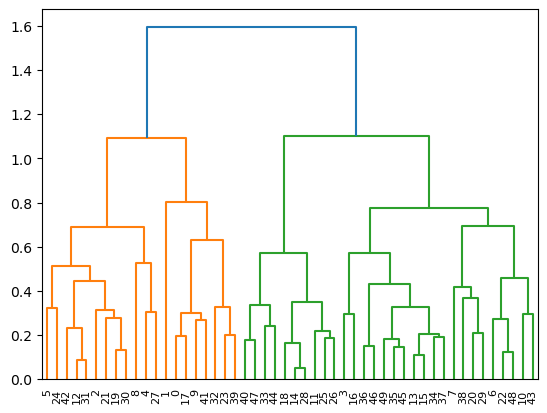

In [11]:
#create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [13]:
hc.fit_predict(df_norm)

array([0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
#save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])


crime['h_clusterid']=y_hc

In [15]:
crime

,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [16]:
crime.groupby(["h_clusterid"])["city"].apply(lambda x:tuple(x))

h_clusterid
0    (Alabama, Arizona, Arkansas, California, Conne...
1                                          (Delaware,)
2                                           (Florida,)
3                                            (Alaska,)
4                                          (Colorado,)
Name: city, dtype: object

In [17]:
crime[crime["city"].isin(["Alabama", "Arizona", "Arkansas", "California"])]

,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [18]:
data1=crime[crime.h_clusterid==0]
data1[["city","h_clusterid"]]
data1["city"].count()

46

# K means

In [19]:
crime=pd.read_csv("crime_data.csv")

In [20]:
crime.rename(columns={'Unnamed: 0':'city'},inplace=True)

In [21]:
df_norm=norm_func(crime.iloc[:,1:])

In [22]:
from sklearn.cluster import KMeans

In [23]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [24]:
model_kmeans.labels_

array([0, 3, 3, 4, 3, 3, 2, 4, 3, 0, 2, 1, 3, 4, 1, 4, 4, 0, 1, 3, 2, 3,
       1, 0, 4, 4, 4, 3, 1, 2, 3, 3, 0, 1, 2, 4, 4, 2, 2, 0, 1, 0, 3, 2,
       1, 4, 2, 1, 1, 4])

In [25]:
md=pd.Series(model_kmeans.labels_)

In [26]:
#Complete-linkage clustering - Wikipedia
crime["labels"]=pd.Series(model_kmeans.labels_)

In [27]:
crime

,city,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [28]:
crime.groupby(["labels"])["city"].apply(lambda x:tuple(x))

labels
0    (Alabama, Georgia, Louisiana, Mississippi, Nor...
1    (Idaho, Iowa, Maine, Minnesota, New Hampshire,...
2    (Connecticut, Hawaii, Massachusetts, New Jerse...
3    (Alaska, Arizona, California, Colorado, Florid...
4    (Arkansas, Delaware, Indiana, Kansas, Kentucky...
Name: city, dtype: object

In [29]:
crime[crime["city"].isin(["Alaska", "Arizona", "California", "Colorado"])]

,city,Murder,Assault,UrbanPop,Rape,labels
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3


In [30]:
crime.columns

Index(['city', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'labels'], dtype='object')

# DB SCAN

In [31]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

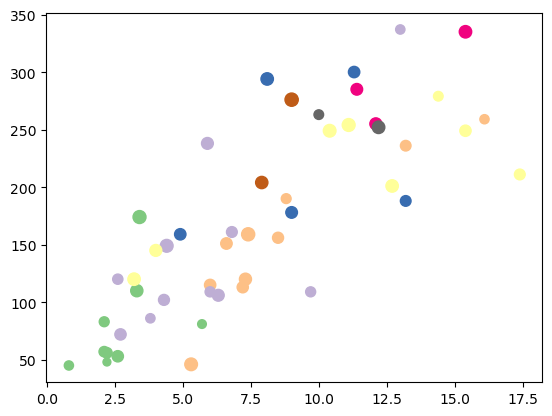

In [32]:
plt.scatter(crime["Murder"],crime["Assault"],crime["UrbanPop"],crime["Rape"],cmap=plt.cm.Accent)


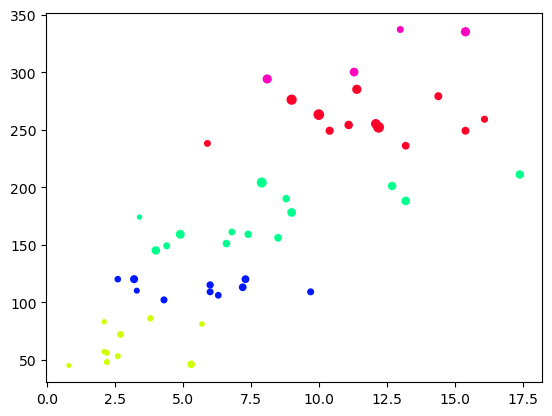

In [33]:
#using kmeans
model = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
model.fit(crime.iloc[:,1:-1])
plt.scatter(crime["Murder"],crime["Assault"],crime["Rape"],c=model.labels_,cmap=plt.cm.gist_rainbow)

In [34]:
model.labels_

array([0, 0, 4, 2, 0, 2, 3, 0, 4, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 4, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 4, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

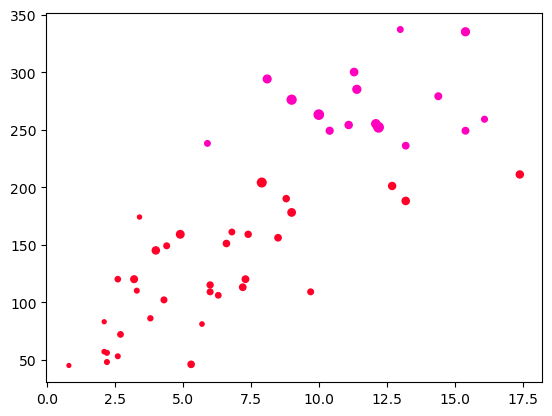

In [35]:
#using hierarchical

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
plt.scatter(crime["Murder"],crime["Assault"],crime["Rape"],c=cluster.fit_predict(crime.iloc[:,[1,2,4]]),cmap=plt.cm.gist_rainbow)


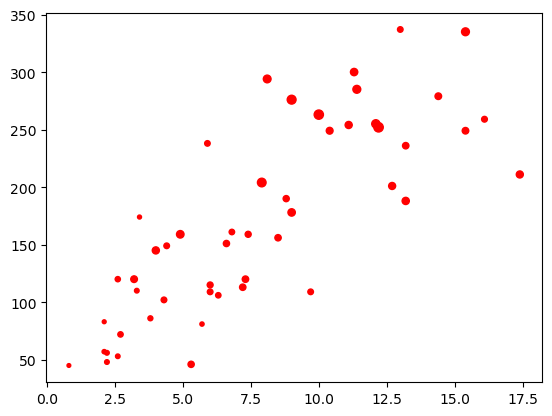

In [36]:
#DBSCAN

dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(crime.iloc[:,1:-1])
plt.scatter(crime["Murder"],crime["Assault"],crime["Rape"],c=claas_pr,cmap=plt.cm.rainbow_r)

# finding the optimal number of clusters

In [37]:
import seaborn as sns
crime.sample(7)

,city,Murder,Assault,UrbanPop,Rape,labels
30,New Mexico,11.4,285,70,32.1,3
18,Maine,2.1,83,51,7.8,1
49,Wyoming,6.8,161,60,15.6,4
40,South Dakota,3.8,86,45,12.8,1
5,Colorado,7.9,204,78,38.7,3
47,West Virginia,5.7,81,39,9.3,1
34,Ohio,7.3,120,75,21.4,2


In [38]:
nc=[1,2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(crime.iloc[:,1:-1])
    iner.append(km.inertia_)

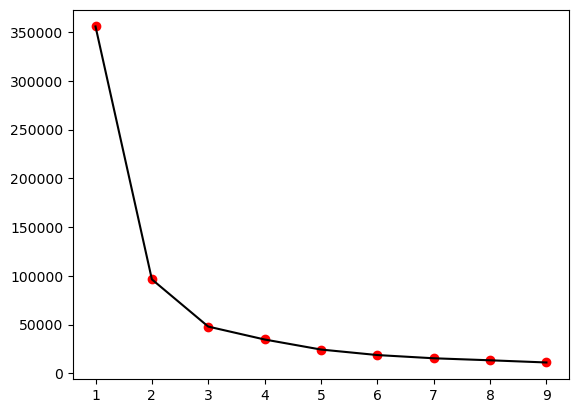

In [39]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# silhouette_score

In [40]:
from sklearn.metrics import silhouette_score as sil

In [41]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(crime.iloc[:,1:-1])
    sc_score.append(sil(crime.iloc[:,1:-1],y))

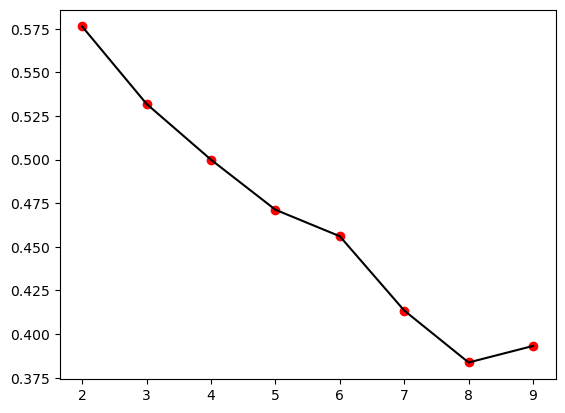

In [42]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [43]:
sc_score

[0.576270501827592,
 0.5319024108339816,
 0.49995555523087537,
 0.4712663068668769,
 0.4560609984337978,
 0.41350970386620134,
 0.3837294897408242,
 0.3932080131345171]